 CORRELATION ANALYSIS
 Correlation heatmap saved as 'correlation_heatmap.png'


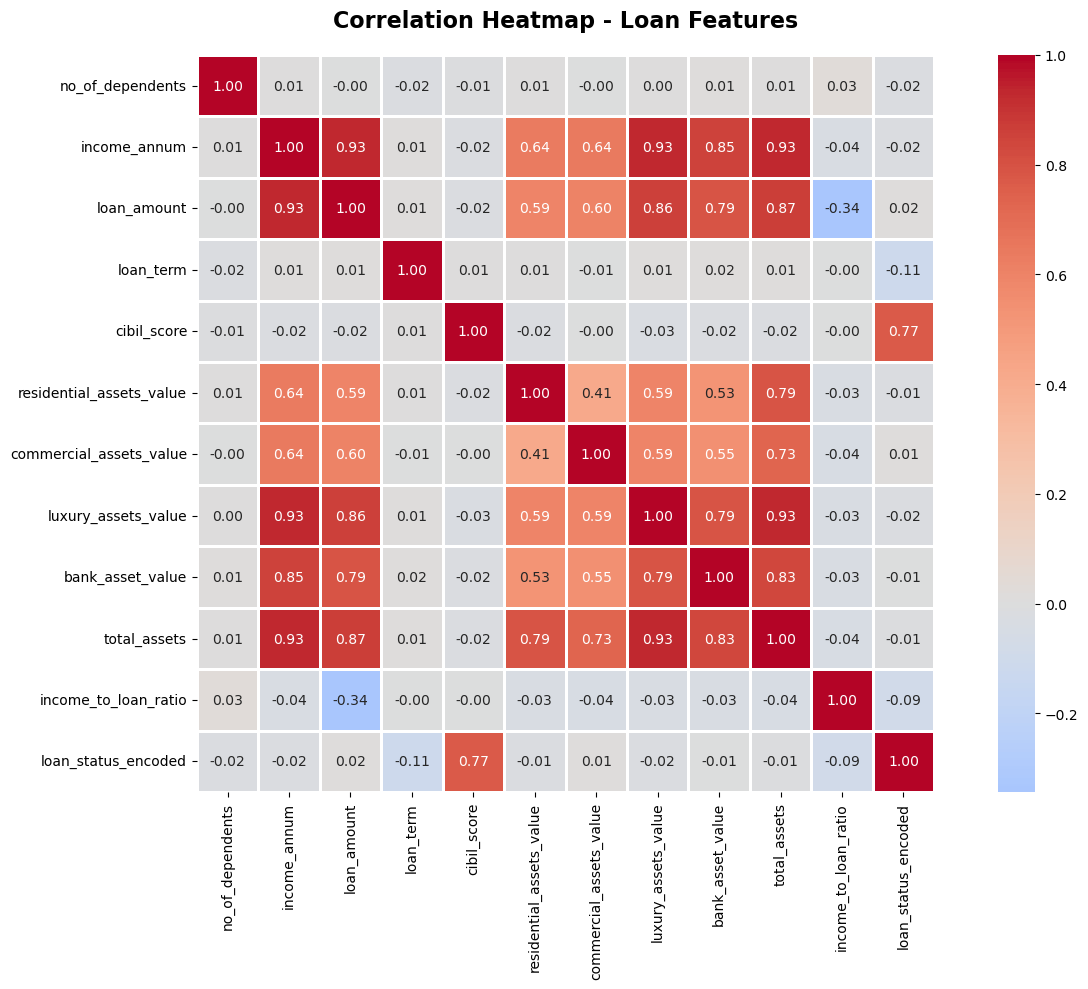


 Key Correlations with Loan Approval:
cibil_score                 0.770518
loan_amount                 0.016150
commercial_assets_value     0.008246
bank_asset_value           -0.006778
total_assets               -0.011281
residential_assets_value   -0.014367
income_annum               -0.015189
luxury_assets_value        -0.015465
no_of_dependents           -0.018114
income_to_loan_ratio       -0.086540
loan_term                  -0.113036
Name: loan_status_encoded, dtype: float64

 Insight: The strongest predictor for loan approval is 'cibil_score' with a correlation of 0.77


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('loan_data_cleaned.csv')

# 1. PRE-PROCESSING FOR CORRELATION
# Correlation requires numeric values. We must convert 'loan_status' to 0 and 1.
# Note: Stripping whitespace is often necessary with this specific dataset.
if 'loan_status' in df.columns:
    df['loan_status'] = df['loan_status'].str.strip()
    df['loan_status_encoded'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

print(" CORRELATION ANALYSIS")


# 2. DEFINE COLUMNS
numeric_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 
                'loan_term', 'cibil_score', 'residential_assets_value',
                'commercial_assets_value', 'luxury_assets_value', 
                'bank_asset_value', 'total_assets', 'income_to_loan_ratio', 
                'loan_status_encoded'] # Added the target here

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# 3. CREATE HEATMAP
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap - Loan Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print(" Correlation heatmap saved as 'correlation_heatmap.png'")
plt.show()

# 4. EXTRACT KEY CORRELATIONS (The missing logic)
print("\n Key Correlations with Loan Approval:")


# Get correlations specifically with the target variable
target_corr = correlation_matrix['loan_status_encoded'].sort_values(ascending=False)

# Remove the target's correlation with itself
target_corr = target_corr.drop('loan_status_encoded')

print(target_corr)

# Highlight the strongest predictor
# Use .iloc[0] to explicitly access by position
strongest = target_corr.index[0]
print(f"\n Insight: The strongest predictor for loan approval is '{strongest}' "
      f"with a correlation of {target_corr.iloc[0]:.2f}")

 CIBIL SCORE IMPACT ANALYSIS

 Approval Rate by CIBIL Score Range:
cibil_range
Poor (0-600)           25.279851
Fair (600-700)         99.428571
Good (700-750)         99.731183
Very Good (750-800)    99.171271
Excellent (800+)       99.565847
Name: loan_status, dtype: float64


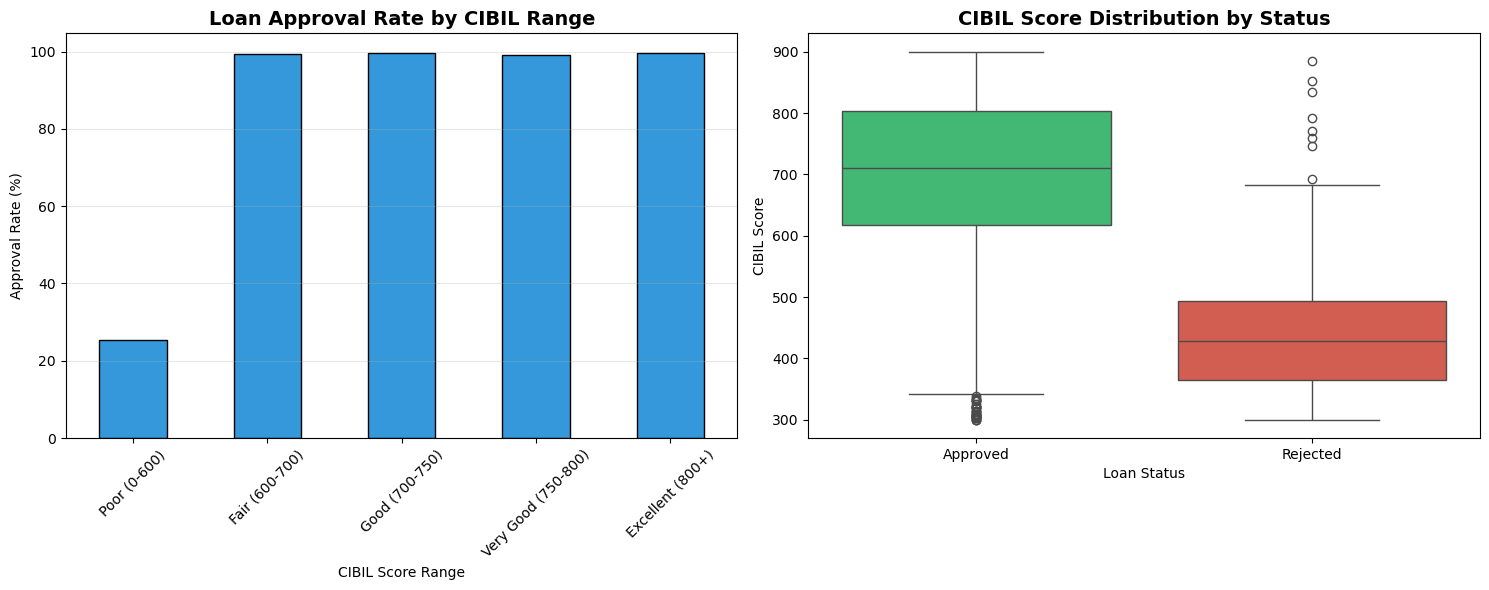


 KEY INSIGHTS:
 • CIBIL scores below 600 have only 25.3% approval rate.
 • CIBIL scores above 700 have 99.5% average approval rate.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CLEANING STEP (Crucial for this dataset)
# Removing leading/trailing spaces from column names and values
df.columns = df.columns.str.strip()
df['loan_status'] = df['loan_status'].str.strip()

print(" CIBIL SCORE IMPACT ANALYSIS")


# 2. CREATE CIBIL SCORE RANGES
df['cibil_range'] = pd.cut(df['cibil_score'], 
                            bins=[0, 600, 700, 750, 800, 900],
                            labels=['Poor (0-600)', 'Fair (600-700)', 
                                    'Good (700-750)', 'Very Good (750-800)', 
                                    'Excellent (800+)'])

# 3. CALCULATE APPROVAL RATE
# We use observed=False to include all categories even if one is empty
cibil_approval = df.groupby('cibil_range', observed=False)['loan_status'].apply(
    lambda x: (x == 'Approved').mean() * 100
).sort_index()

print("\n Approval Rate by CIBIL Score Range:")
print(cibil_approval)

# 4. VISUALIZATION
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Bar Chart
cibil_approval.plot(kind='bar', color='#3498db', edgecolor='black', ax=axes[0])
axes[0].set_title('Loan Approval Rate by CIBIL Range', fontsize=14, fontweight='bold')
axes[0].set_xlabel('CIBIL Score Range')
axes[0].set_ylabel('Approval Rate (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Boxplot (Cleaned and Warning-Free)
sns.boxplot(
    x='loan_status', 
    y='cibil_score', 
    data=df, 
    hue='loan_status', 
    palette={'Approved': '#2ecc71', 'Rejected': '#e74c3c'}, 
    legend=False, 
    ax=axes[1]
)
axes[1].set_title('CIBIL Score Distribution by Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('CIBIL Score')

plt.tight_layout()
plt.savefig('cibil_score_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. KEY INSIGHTS (Using .iloc for safety)
print("\n KEY INSIGHTS:")
print(f" • CIBIL scores below 600 have only {cibil_approval.iloc[0]:.1f}% approval rate.")
print(f" • CIBIL scores above 700 have {cibil_approval.iloc[2:].mean():.1f}% average approval rate.")


 INCOME VS LOAN AMOUNT ANALYSIS

Loan-to-Income Ratio Statistics:
count    4269.000000
mean        2.984807
std         0.595496
min         1.500000
25%         2.464286
50%         3.000000
75%         3.500000
max         4.000000
Name: loan_to_income_ratio, dtype: float64

 Approval Rate by Loan-to-Income Ratio:
lti_range
Very Low (0-2x)    53.333333
Low (2-4x)         62.472885
Moderate (4-6x)          NaN
High (6-8x)              NaN
Very High (8x+)          NaN
Name: loan_status, dtype: float64

 Income-Loan analysis visualization saved!


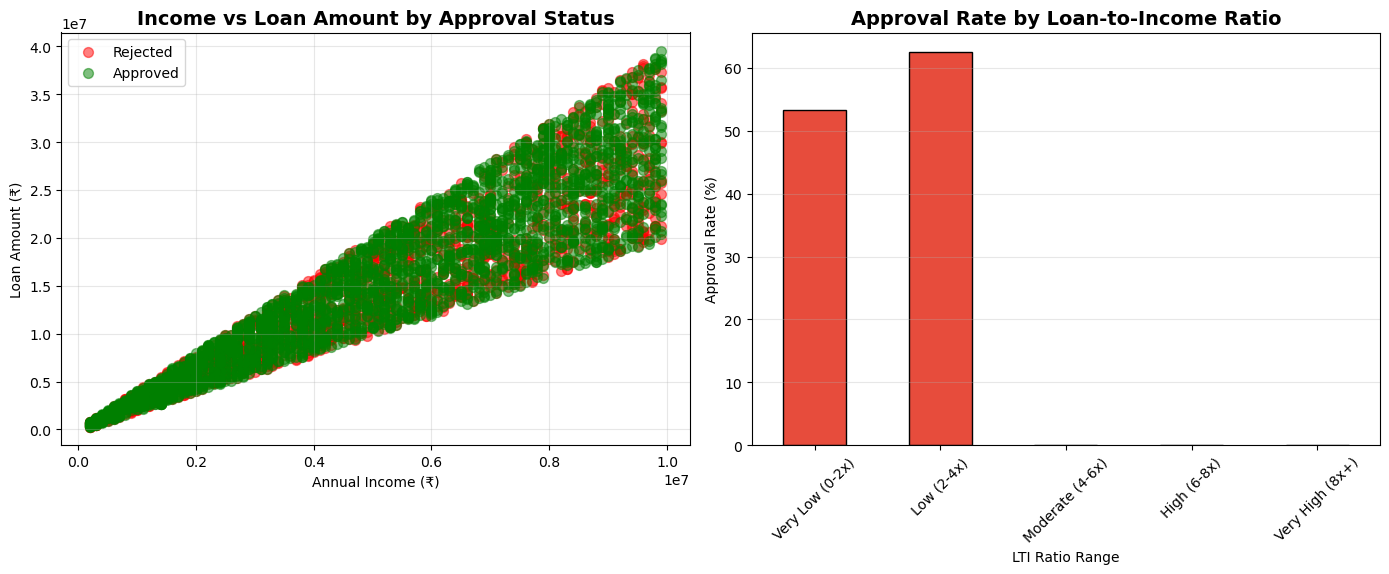


 KEY INSIGHT:
   Average Loan-to-Income Ratio (Approved): 3.03x
   Average Loan-to-Income Ratio (Rejected): 2.92x


In [4]:
print("\n INCOME VS LOAN AMOUNT ANALYSIS")


# Calculate loan-to-income ratio (CORRECTED)
df['loan_to_income_ratio'] = (df['loan_amount'] / df['income_annum'])

# Let's check the actual range of this ratio
print("\nLoan-to-Income Ratio Statistics:")
print(df['loan_to_income_ratio'].describe())

# Create better ratio ranges based on actual data
df['lti_range'] = pd.cut(df['loan_to_income_ratio'], 
                          bins=[0, 2, 4, 6, 8, 100],
                          labels=['Very Low (0-2x)', 'Low (2-4x)', 
                                 'Moderate (4-6x)', 'High (6-8x)', 
                                 'Very High (8x+)'])

lti_approval = df.groupby('lti_range', observed=False)['loan_status'].apply(
    lambda x: (x == 'Approved').mean() * 100
).sort_index()

print("\n Approval Rate by Loan-to-Income Ratio:")
print(lti_approval)

# Visualization
plt.figure(figsize=(14, 6))

# Plot 1: Scatter plot
plt.subplot(1, 2, 1)
approved = df[df['loan_status'] == 'Approved']
rejected = df[df['loan_status'] == 'Rejected']

plt.scatter(rejected['income_annum'], rejected['loan_amount'], 
           alpha=0.5, c='red', label='Rejected', s=50)
plt.scatter(approved['income_annum'], approved['loan_amount'], 
           alpha=0.5, c='green', label='Approved', s=50)
plt.title('Income vs Loan Amount by Approval Status', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (₹)')
plt.ylabel('Loan Amount (₹)')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: LTI approval rates
plt.subplot(1, 2, 2)
lti_approval.plot(kind='bar', color='#e74c3c', edgecolor='black')
plt.title('Approval Rate by Loan-to-Income Ratio', fontsize=14, fontweight='bold')
plt.xlabel('LTI Ratio Range')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('income_loan_analysis.png', dpi=300, bbox_inches='tight')
print("\n Income-Loan analysis visualization saved!")
plt.show()

print("\n KEY INSIGHT:")
print(f"   Average Loan-to-Income Ratio (Approved): {approved['loan_to_income_ratio'].mean():.2f}x")
print(f"   Average Loan-to-Income Ratio (Rejected): {rejected['loan_to_income_ratio'].mean():.2f}x")


 ASSET VALUE ANALYSIS

 Average Asset Values by Loan Status:
             residential_assets_value  commercial_assets_value  \
loan_status                                                      
Approved                 7.399812e+06             5.001355e+06   
Rejected                 7.592498e+06             4.926720e+06   

             luxury_assets_value  bank_asset_value  total_assets  
loan_status                                                       
Approved            1.501660e+07      4.959526e+06  3.237730e+07  
Rejected            1.530694e+07      5.004960e+06  3.283112e+07  

 Asset analysis visualization saved!


<Figure size 1400x600 with 0 Axes>

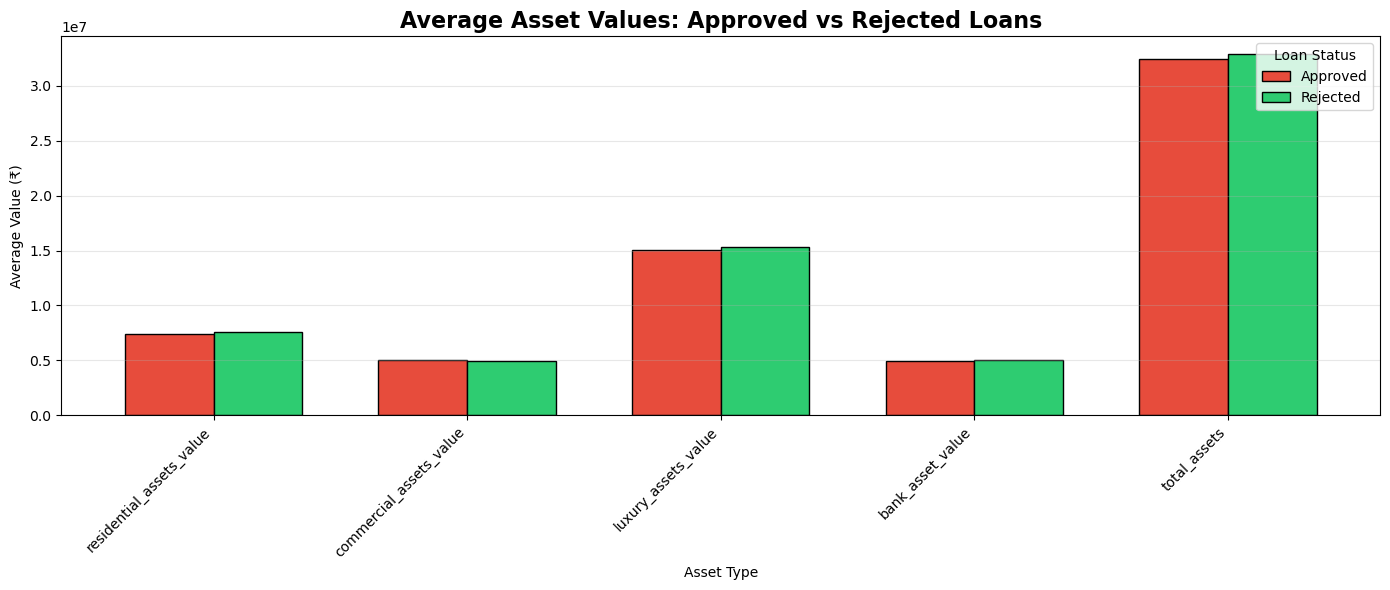

In [5]:
print("\n ASSET VALUE ANALYSIS")


# Average assets by loan status
asset_cols = ['residential_assets_value', 'commercial_assets_value', 
              'luxury_assets_value', 'bank_asset_value', 'total_assets']

asset_comparison = df.groupby('loan_status')[asset_cols].mean()
print("\n Average Asset Values by Loan Status:")
print(asset_comparison)

# Visualization
plt.figure(figsize=(14, 6))

# Plot assets comparison
asset_comparison.T.plot(kind='bar', figsize=(14, 6), 
                        color=['#e74c3c', '#2ecc71'], 
                        edgecolor='black', width=0.7)
plt.title('Average Asset Values: Approved vs Rejected Loans', 
         fontsize=16, fontweight='bold')
plt.xlabel('Asset Type')
plt.ylabel('Average Value (₹)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('asset_analysis.png', dpi=300, bbox_inches='tight')
print("\n Asset analysis visualization saved!")
plt.show()

In [6]:

print(" COMPREHENSIVE BUSINESS INSIGHTS REPORT")


# 1. Overall Statistics
total_applications = len(df)
approved_count = (df['loan_status'] == 'Approved').sum()
rejected_count = (df['loan_status'] == 'Rejected').sum()
approval_rate = (approved_count / total_applications) * 100

print(f"\n OVERALL STATISTICS:")
print(f"   • Total Loan Applications: {total_applications:,}")
print(f"   • Approved Loans: {approved_count:,}")
print(f"   • Rejected Loans: {rejected_count:,}")
print(f"   • Approval Rate: {approval_rate:.2f}%")

# 2. CIBIL Score Insights
avg_cibil_approved = df[df['loan_status'] == 'Approved']['cibil_score'].mean()
avg_cibil_rejected = df[df['loan_status'] == 'Rejected']['cibil_score'].mean()

print(f"\n CIBIL SCORE INSIGHTS:")
print(f"   • Average CIBIL (Approved): {avg_cibil_approved:.0f}")
print(f"   • Average CIBIL (Rejected): {avg_cibil_rejected:.0f}")
print(f"   • CIBIL Score Difference: {avg_cibil_approved - avg_cibil_rejected:.0f} points")

# 3. Income Insights
avg_income_approved = df[df['loan_status'] == 'Approved']['income_annum'].mean()
avg_income_rejected = df[df['loan_status'] == 'Rejected']['income_annum'].mean()

print(f"\n INCOME INSIGHTS:")
print(f"   • Average Income (Approved): ₹{avg_income_approved:,.0f}")
print(f"   • Average Income (Rejected): ₹{avg_income_rejected:,.0f}")

# 4. Loan Amount Insights
avg_loan_approved = df[df['loan_status'] == 'Approved']['loan_amount'].mean()
avg_loan_rejected = df[df['loan_status'] == 'Rejected']['loan_amount'].mean()

print(f"\n LOAN AMOUNT INSIGHTS:")
print(f"   • Average Loan (Approved): ₹{avg_loan_approved:,.0f}")
print(f"   • Average Loan (Rejected): ₹{avg_loan_rejected:,.0f}")

# 5. Asset Insights
avg_assets_approved = df[df['loan_status'] == 'Approved']['total_assets'].mean()
avg_assets_rejected = df[df['loan_status'] == 'Rejected']['total_assets'].mean()

print(f"\n ASSET INSIGHTS:")
print(f"   • Average Total Assets (Approved): ₹{avg_assets_approved:,.0f}")
print(f"   • Average Total Assets (Rejected): ₹{avg_assets_rejected:,.0f}")

# 6. Key Risk Factors
rejected_data = df[df['loan_status'] == 'Rejected']
print(f"\n KEY RISK FACTORS IDENTIFIED:")
print(f"   1. CIBIL Score below 700 (Only {cibil_approval.iloc[0]:.1f}% approval)")
print(f"   2. Low total assets (below ₹{df['total_assets'].quantile(0.25):,.0f})")
print(f"   3. High loan-to-income ratio (above 6x)")
print(f"   4. Low annual income (below ₹{df['income_annum'].quantile(0.25):,.0f})")

# 7. Recommendations
print(f"\n BUSINESS RECOMMENDATIONS:")
print(f"   1. Prioritize applicants with CIBIL score > 750")
print(f"   2. Set maximum Loan-to-Income ratio at 6x")
print(f"   3. Require minimum total assets of ₹{df['total_assets'].quantile(0.25):,.0f}")
print(f"   4. Enhanced verification for loans > ₹{df['loan_amount'].quantile(0.75):,.0f}")
print(f"   5. Implement tiered approval system based on CIBIL ranges")


print(" ANALYSIS COMPLETE!")


 COMPREHENSIVE BUSINESS INSIGHTS REPORT

 OVERALL STATISTICS:
   • Total Loan Applications: 4,269
   • Approved Loans: 2,656
   • Rejected Loans: 1,613
   • Approval Rate: 62.22%

 CIBIL SCORE INSIGHTS:
   • Average CIBIL (Approved): 703
   • Average CIBIL (Rejected): 429
   • CIBIL Score Difference: 274 points

 INCOME INSIGHTS:
   • Average Income (Approved): ₹5,025,904
   • Average Income (Rejected): ₹5,113,825

 LOAN AMOUNT INSIGHTS:
   • Average Loan (Approved): ₹15,247,252
   • Average Loan (Rejected): ₹14,946,063

 ASSET INSIGHTS:
   • Average Total Assets (Approved): ₹32,377,297
   • Average Total Assets (Rejected): ₹32,831,122

 KEY RISK FACTORS IDENTIFIED:
   1. CIBIL Score below 700 (Only 25.3% approval)
   2. Low total assets (below ₹16,300,000)
   3. High loan-to-income ratio (above 6x)
   4. Low annual income (below ₹2,700,000)

 BUSINESS RECOMMENDATIONS:
   1. Prioritize applicants with CIBIL score > 750
   2. Set maximum Loan-to-Income ratio at 6x
   3. Require minimum 

In [7]:
# Create a Power BI ready dataset
print("\n PREPARING DATA FOR POWER BI...")

# Create final dataset with all features
powerbi_data = df.copy()

# Encode categorical variables for Power BI
powerbi_data['loan_status_numeric'] = powerbi_data['loan_status'].map({
    'Approved': 1,
    'Rejected': 0
})

powerbi_data['education_numeric'] = powerbi_data['education'].map({
    'Graduate': 1,
    'Not Graduate': 0
})

powerbi_data['self_employed_numeric'] = powerbi_data['self_employed'].map({
    'Yes': 1,
    'No': 0
})

# Save for Power BI
powerbi_data.to_csv('loan_data_powerbi.csv', index=False)
print(" Power BI dataset saved as 'loan_data_powerbi.csv'")

# Create summary table
summary_table = pd.DataFrame({
    'Metric': ['Total Applications', 'Approved Loans', 'Rejected Loans', 
               'Approval Rate (%)', 'Avg CIBIL (Approved)', 'Avg CIBIL (Rejected)',
               'Avg Income (Approved)', 'Avg Loan Amount (Approved)',
               'Avg Assets (Approved)'],
    'Value': [
        total_applications,
        approved_count,
        rejected_count,
        round(approval_rate, 2),
        round(avg_cibil_approved, 0),
        round(avg_cibil_rejected, 0),
        round(avg_income_approved, 0),
        round(avg_loan_approved, 0),
        round(avg_assets_approved, 0)
    ]
})

summary_table.to_csv('summary_metrics.csv', index=False)
print("Summary metrics saved as 'summary_metrics.csv'")

print("\n Ready for Power BI!")
print("\n Files created:")
print("   ✓ loan_data_powerbi.csv")
print("   ✓ summary_metrics.csv")
print("   ✓ All visualization images")


 PREPARING DATA FOR POWER BI...
 Power BI dataset saved as 'loan_data_powerbi.csv'
Summary metrics saved as 'summary_metrics.csv'

 Ready for Power BI!

 Files created:
   ✓ loan_data_powerbi.csv
   ✓ summary_metrics.csv
   ✓ All visualization images
